In [1]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [16]:

trail1 = dataset.ix[ (dataset['CIG30USE'] <=31) & (dataset['SNF30USE'] <= 31) & (dataset['CGR30USE']<= 31) & (dataset['COCEVER']<=2)& (dataset['ALCEVER']<=2) ].copy()
trail = trail1.ix[: , ['CIG30USE', 'SNF30USE','CGR30USE','COCEVER','ALCEVER']].copy()


trail.head()

,CIG30USE,SNF30USE,CGR30USE,COCEVER,ALCEVER
146,30,20,5,1,1
529,25,2,1,1,1
547,6,28,2,2,1
623,30,30,1,2,1
707,30,2,1,2,1


In [14]:
#age_correlation = dataset.ix[ (dataset['MJAGE'] < 90) & (dataset['ALCTRY'] < 90) & (dataset['CIGARTRY']< 90)  ].copy()
#trail = age_correlation.ix[: , ['MJAGE', 'ALCTRY','CIGARTRY','CIGEVER']].copy()
#trail.shape

(11750, 4)

In [17]:
trail

#MJAGE ALCTRY  CIGARTRY
#trail['class'] = 1 
#trail['class'][ (trail['MJAGE']<12)  ] = 1
#trail['class'][ (trail['MJAGE']>=12) & (trail['MJAGE']<=18) ] = 2
#trail['class'][ (trail['MJAGE']>=18 )] = 3

trail['class'] = 3
trail['class'][ (trail['CIG30USE']<10)  ] = 1
trail['class'][ (trail['CIG30USE']>=10) & (trail['CIG30USE']<20) ] = 2
trail['class'][ (trail['CIG30USE']>20 ) ] = 3
#trail['class'][ (trail['COCEVER']==1) & ((trail['ALCEVER']==1)) ] = 1 
#trail['class'][ (trail['COCEVER']==2) & ((trail['ALCEVER']==1)) ] = 2
#trail['class'][ (trail['COCEVER']==1) & ((trail['ALCEVER']==2)) ] = 3
#trail['class'][ (trail['COCEVER']==2) & ((trail['ALCEVER']==2)) ] = 4

trail_noclass=trail.ix[:, 'CIG30USE': 'ALCEVER']
test= trail_noclass.values
target=trail.values

In [18]:
trail.head()


,CIG30USE,SNF30USE,CGR30USE,COCEVER,ALCEVER,class
146,30,20,5,1,1,3
529,25,2,1,1,1,3
547,6,28,2,2,1,1
623,30,30,1,2,1,3
707,30,2,1,2,1,3


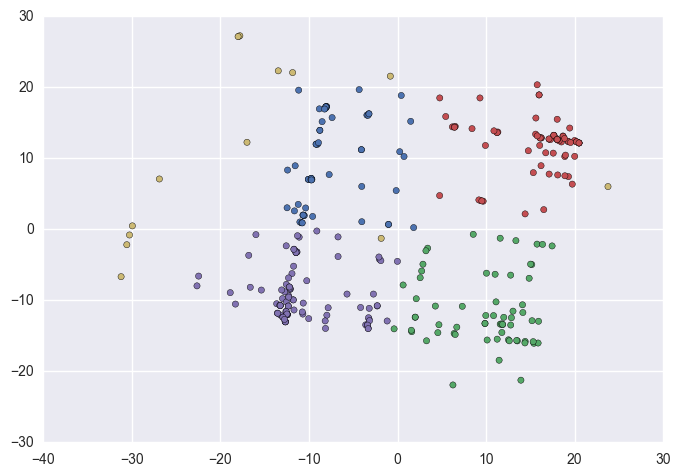

In [23]:
from IPython.html.widgets import interact
colors = sns.color_palette(n_colors=10)


mds_pos = mds.fit(test).embedding_

@interact(n_clusters=(1,10))
def draw_plot(n_clusters):
    instance = KMeans(n_clusters=n_clusters, random_state = 102)
    clusters_assignment = instance.fit_predict(test)
    plt.scatter(mds_pos[:, 0], mds_pos[:, 1], s=20, c=[colors[i] for i in clusters_assignment])

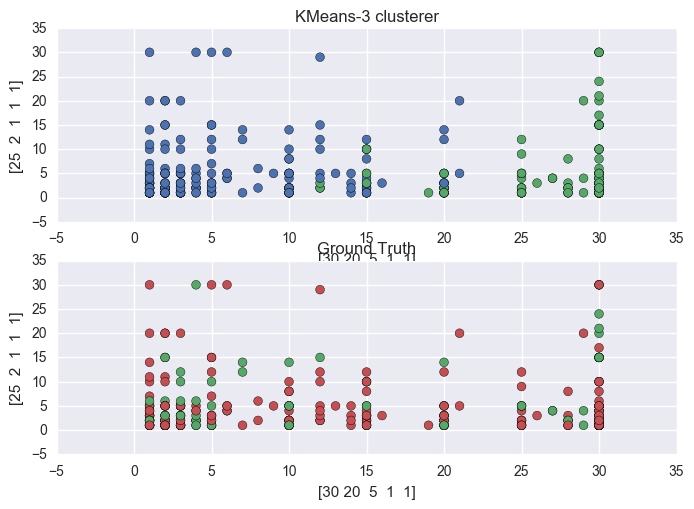

In [24]:
pred = KMeans(n_clusters=2, random_state = 102).fit_predict(test)
colors = sns.color_palette()

plt.subplot(211)
plt.scatter(test[:, 1], test[:, 2], c=[colors[i] for i in pred], s=40)
plt.title('KMeans-3 clusterer')
plt.xlabel(test[0])
plt.ylabel(test[1])

plt.subplot(212)
plt.scatter(target[:, 1], target[:, 2], c=[colors[i] for i in target[:,3]] , s=40)
plt.title('Ground Truth')
plt.xlabel(test[0])
plt.ylabel(test[1])

In [88]:
dataset_All = dataset.ix[:, ['CASEID', 'QUESTID2', 'ALCEVER', 'ALCDAYS', 'ALCTRY', 'MJEVER', 'MJDAY30A', 'MJAGE', 'CIGEVER', 'CIG30USE', 'CIGTRY', 'SNFEVER', 'SNF30USE', 'SNUFTRY', 'CIGAREVR', 'CGR30USE', 'CIGARTRY']].copy()
dataset_All['ALCTRY'] = dataset_All.ix[dataset_All['ALCTRY']<90, 'ALCTRY']
dataset_All['MJAGE'] = dataset_All.ix[dataset_All['MJAGE']<90, 'MJAGE']
dataset_All['CIGTRY'] = dataset_All.ix[dataset_All['CIGTRY']<90, 'CIGTRY']
dataset_All['SNUFTRY'] = dataset_All.ix[dataset_All['SNUFTRY']<90, 'SNUFTRY']
dataset_All['CIGARTRY'] = dataset_All.ix[dataset_All['CIGARTRY']<90, 'CIGARTRY']
dataset_All = dataset_All.fillna(0)

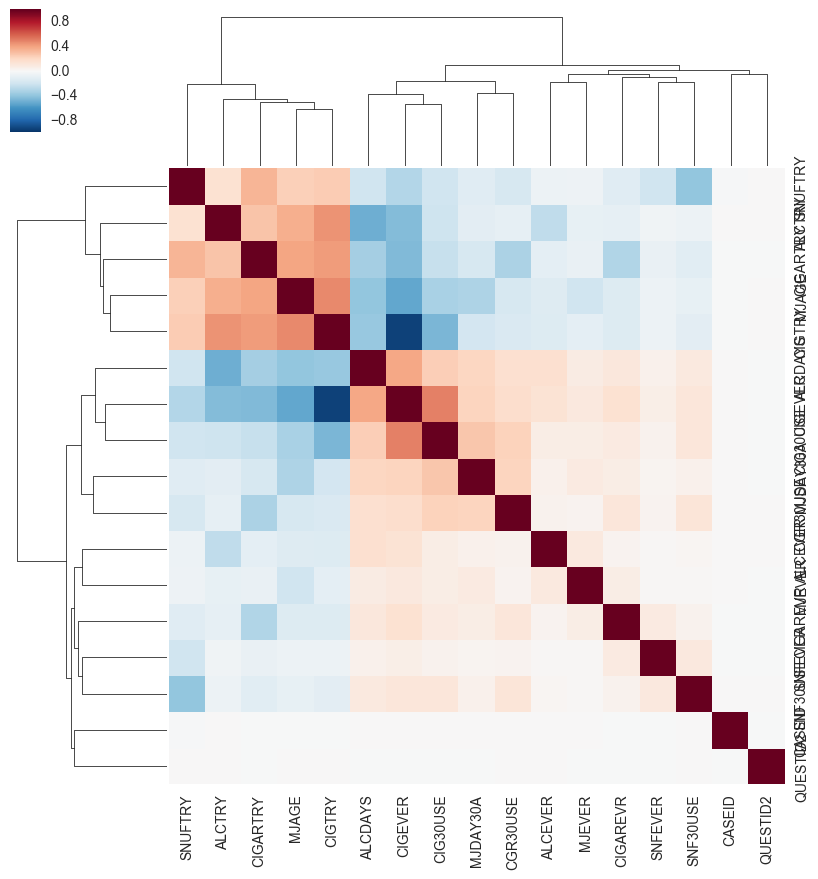

In [89]:
corrmat = dataset_All.corr()

# draw a clustered heatmap using seaborn
sns.clustermap(corrmat, square=True)